<a href="https://colab.research.google.com/github/FrankPunyaBarang/RAPP_Assignment/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Q1a. summary statistic

In [ ]:
import pandas as pd
data = pd.read_csv('https://gist.githubusercontent.com/FrankPunyaBarang/3a142bc34cfda151923be09fc1d9428e/raw/d97a954f6292f2f342ef24a2a4b6028cb1575313/ingredient.csv')
data.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


Q1a. parametric and non-parametric test

In [24]:
from scipy.stats import ttest_ind, f_oneway, ranksums
t_test_results = ttest_ind(data['a'], data['b'])
print(t_test_results)
wilcoxon_results = ranksums(data['a'], data['b'])
print(wilcoxon_results)

TtestResult(statistic=-212.98825817792465, pvalue=0.0, df=426.0)
RanksumsResult(statistic=-17.895579014151743, pvalue=1.2766301220211809e-71)


Q1a. Correlation matrix

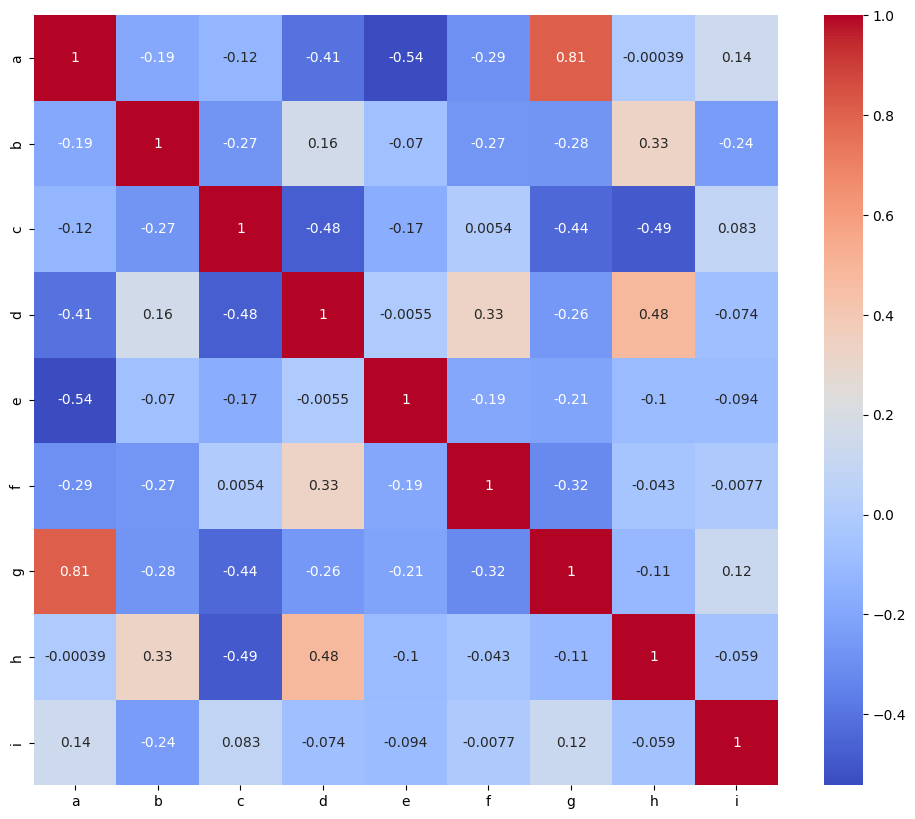

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Q1a. ANOVA

In [23]:
anova_results = f_oneway(data['a'], data['b'], data['c'])
#plt.show()
print(anova_results)

F_onewayResult(statistic=10036.7585319187, pvalue=0.0)


Q1-b. Graphical Analysis

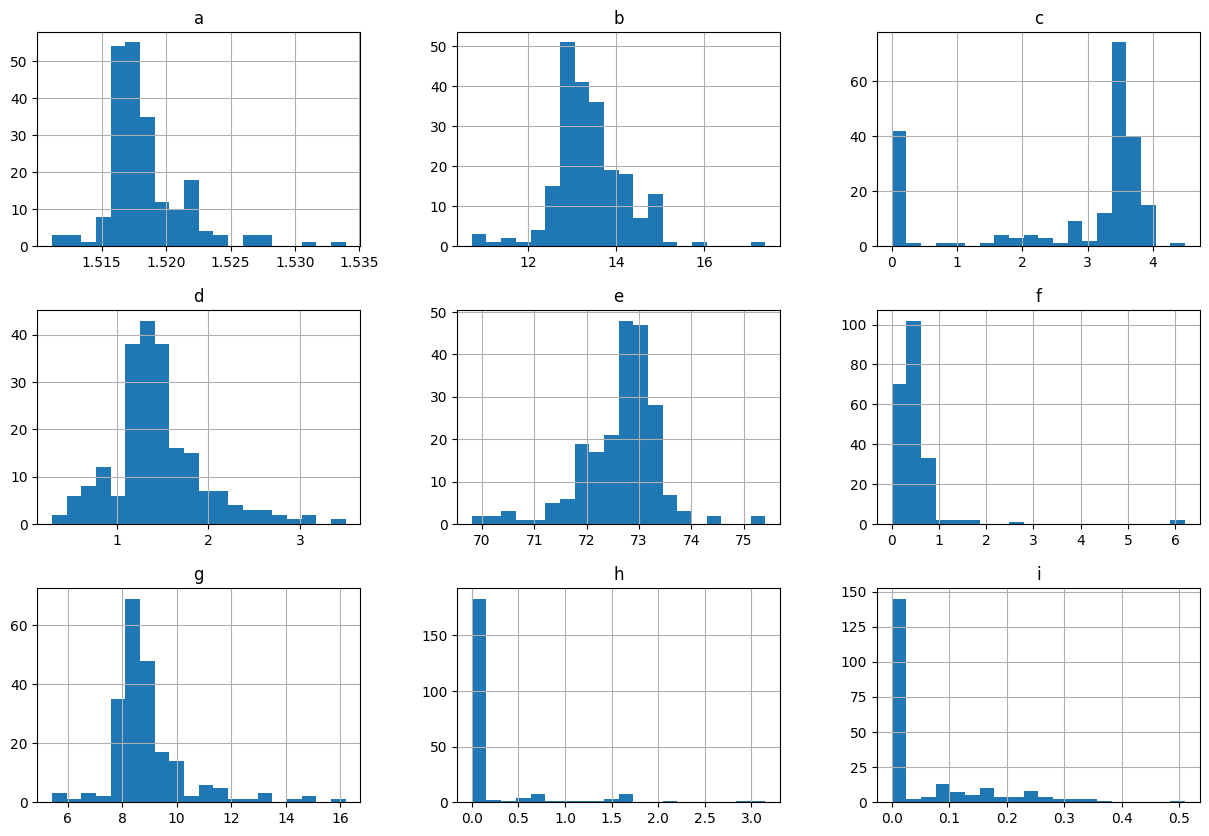

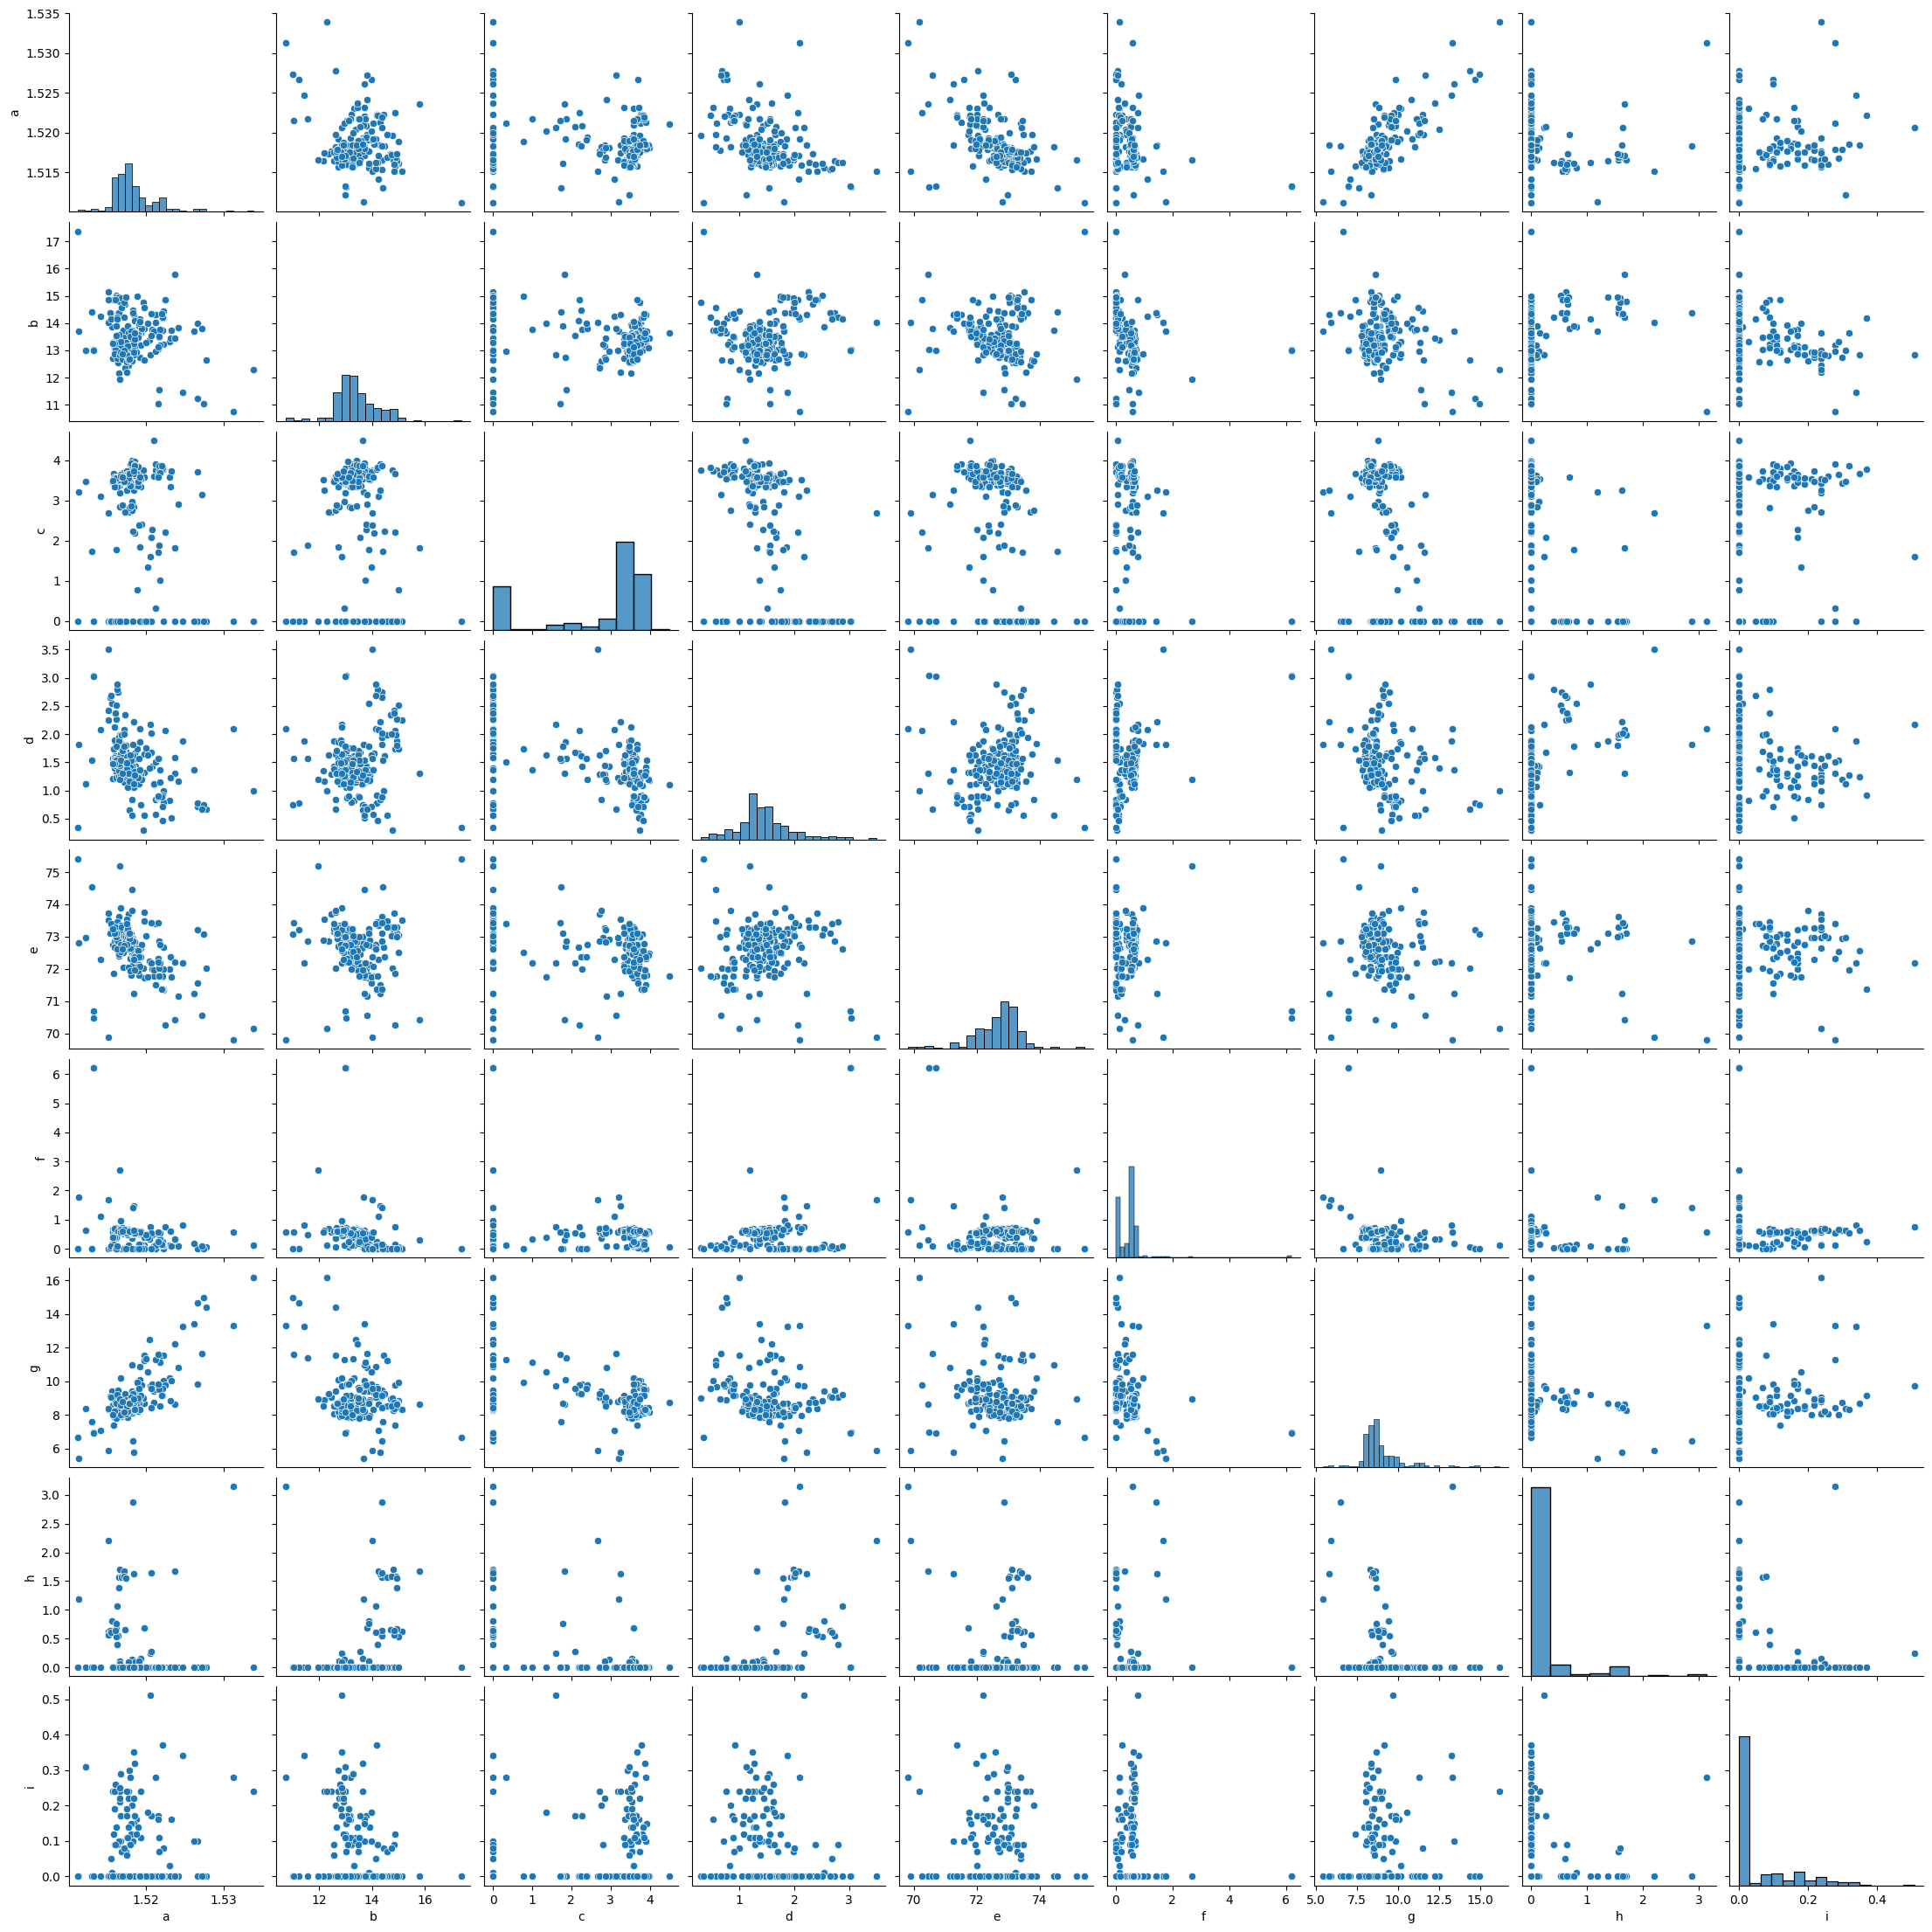

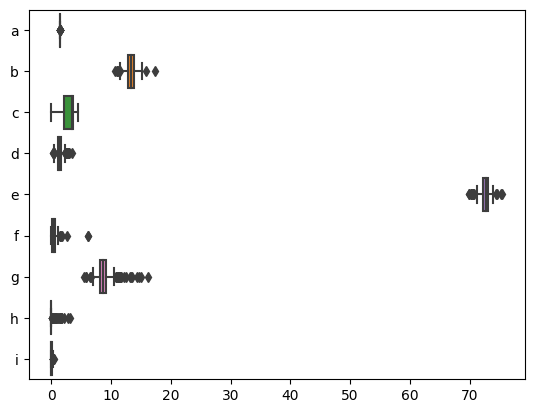

In [ ]:
# Distribution Study (Histograms)
data.hist(bins=20, figsize=(15, 10))
plt.show()

# Pairwise Scatter Plots
sns.pairplot(data)
plt.show()

# Boxplots
sns.boxplot(data=data, orient='h')
plt.show()

Q1c. Cluster Test

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

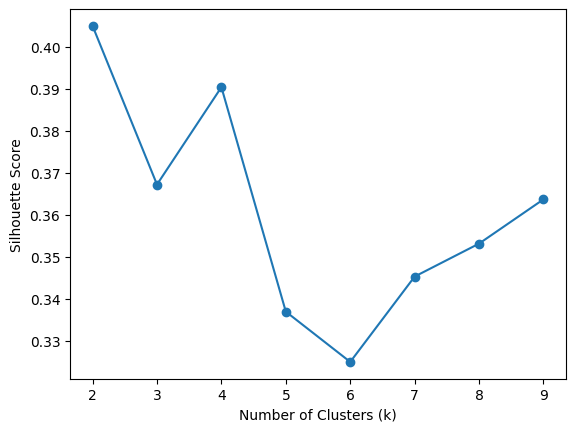

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


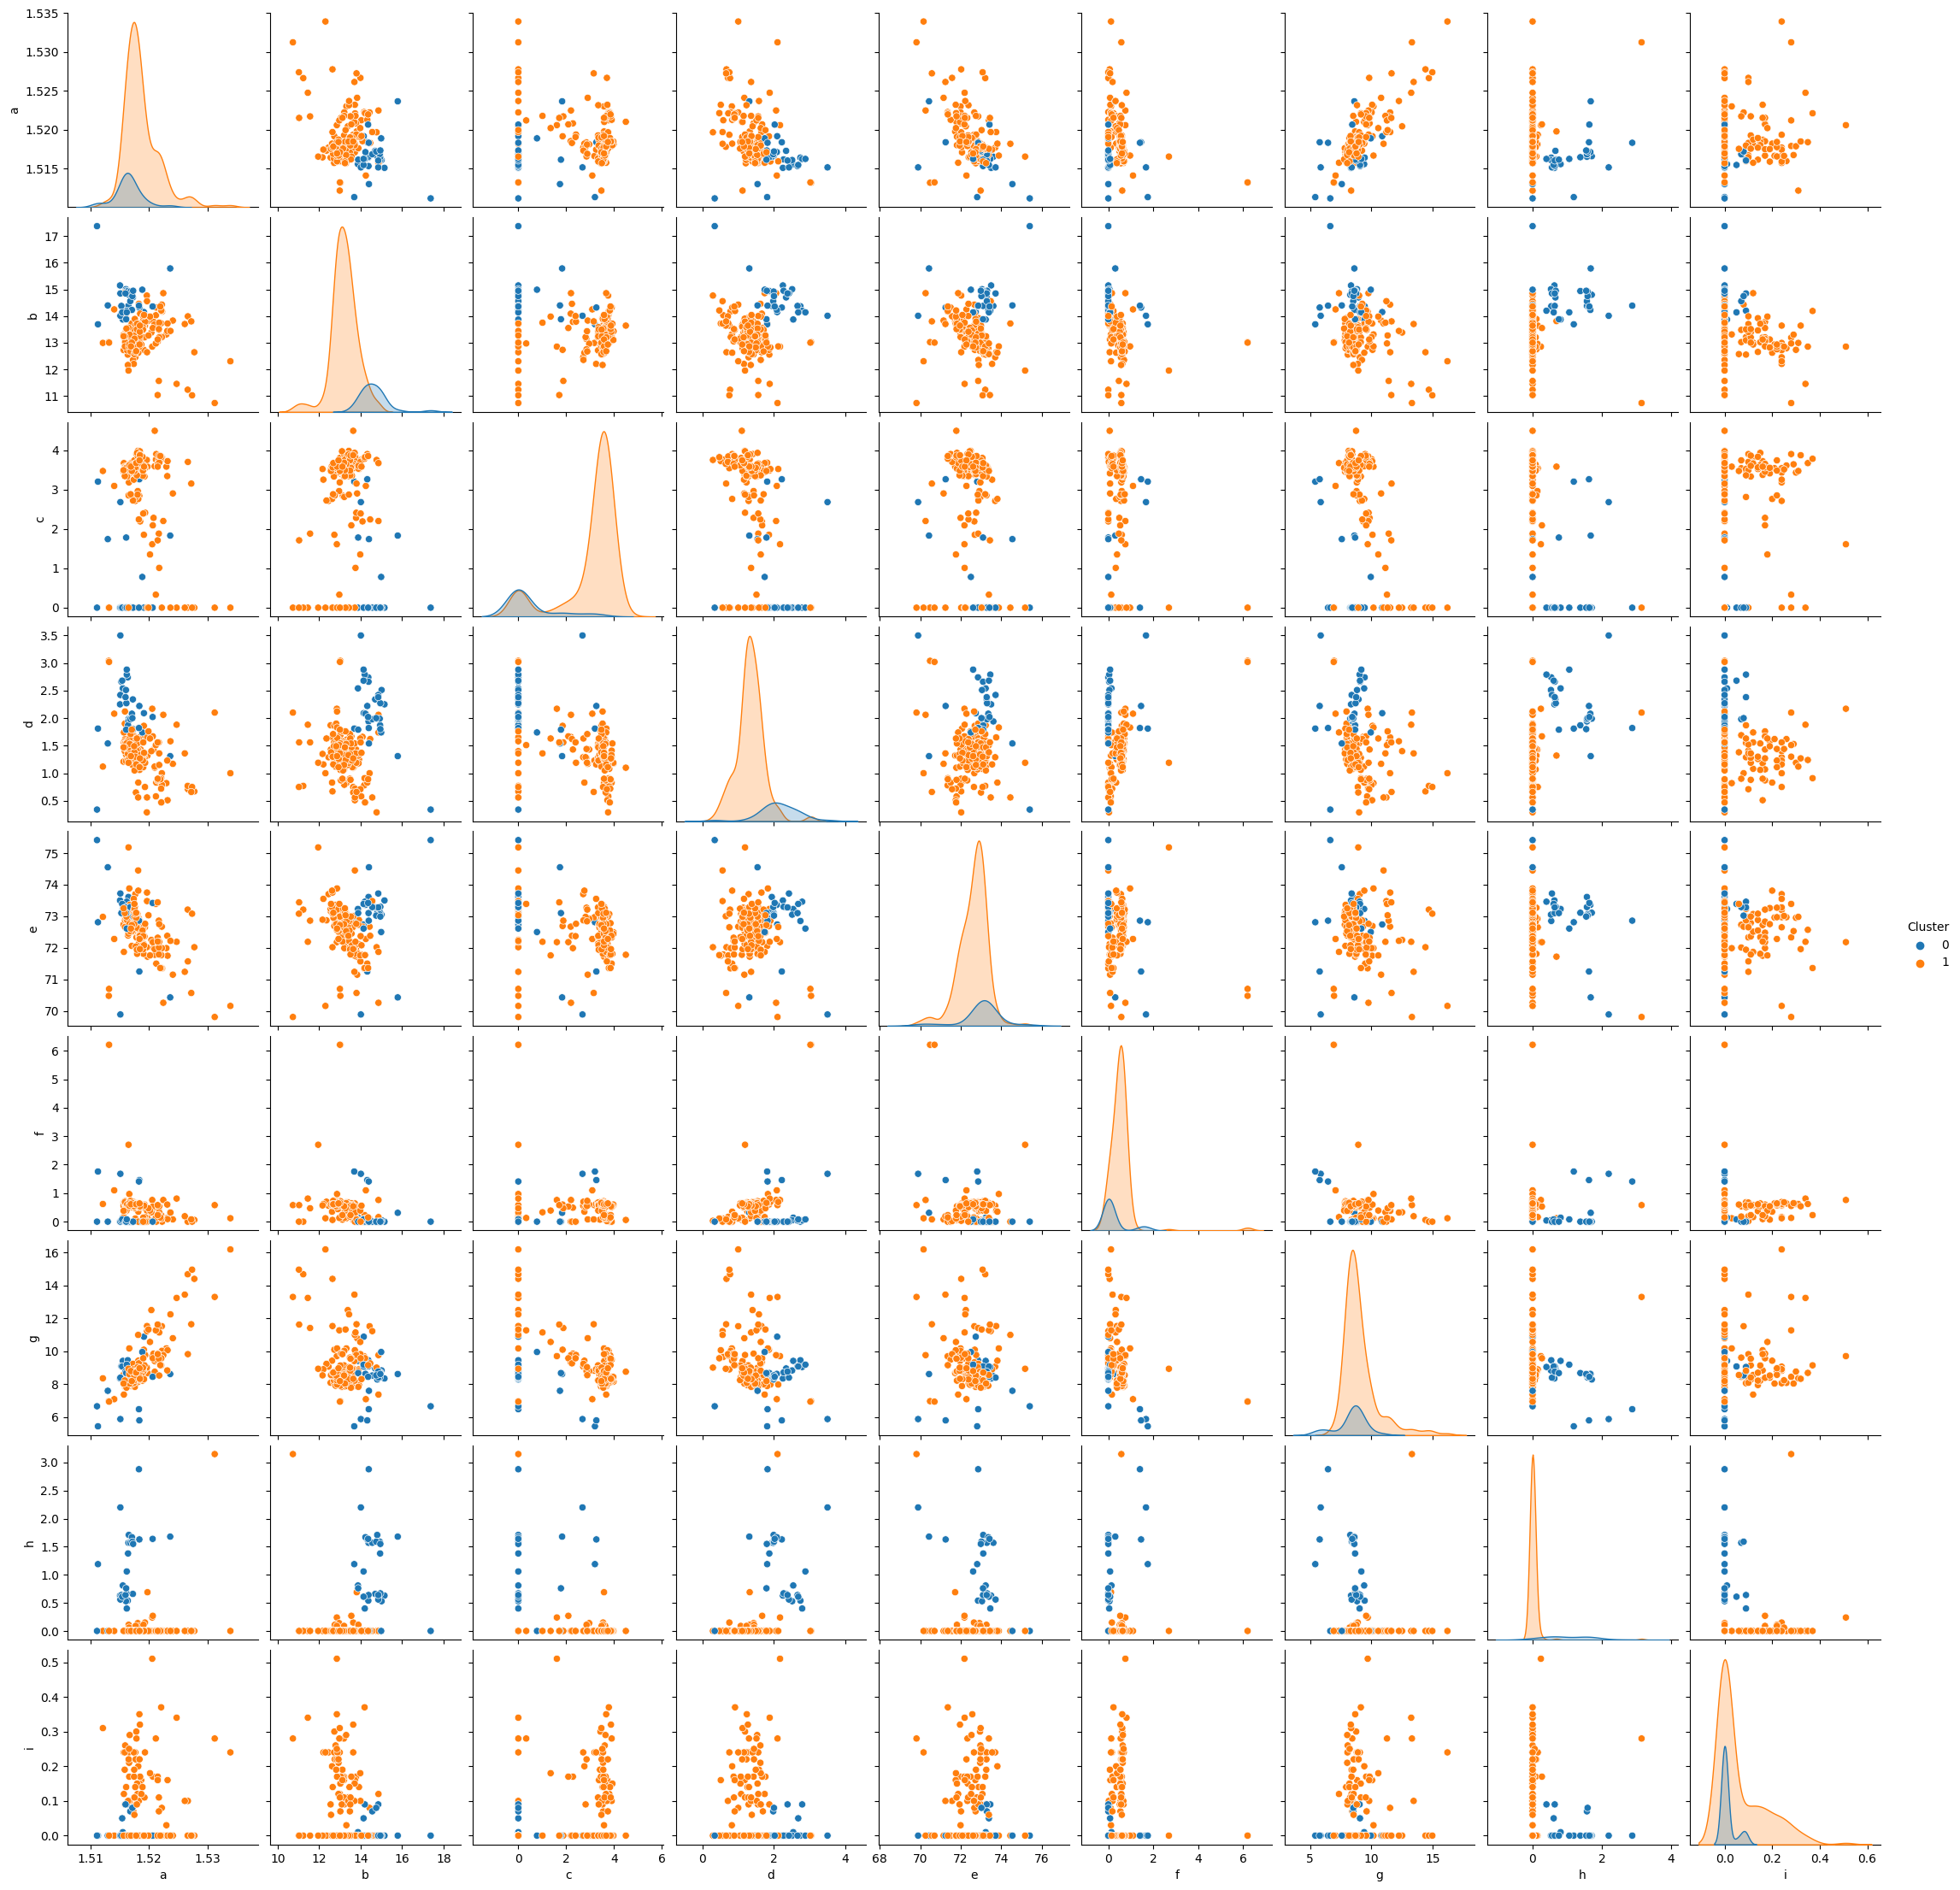

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# K-means clustering
k_values = range(2, 10)
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plot the Elbow Curve
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Choose the optimal k and perform clustering
optimal_k = k_values[np.argmax(silhouette_scores)]
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_optimal.fit_predict(scaled_data)

# Visualize Clusters
data['Cluster'] = clusters
sns.pairplot(data, hue='Cluster')
plt.show()

Q2. descriptive statistic

In [33]:
import pandas as pd
palm_data = pd.read_csv('https://gist.githubusercontent.com/FrankPunyaBarang/3a142bc34cfda151923be09fc1d9428e/raw/d97a954f6292f2f342ef24a2a4b6028cb1575313/palm_ffb.csv')
palm_data['Date'] = pd.to_datetime(palm_data['Date'], format='%d.%m.%Y')
palm_data.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


Q2. Corelation Statistics

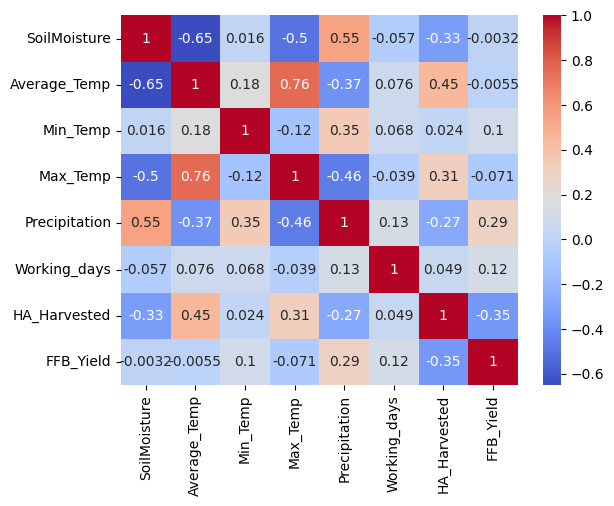

               SoilMoisture  Average_Temp  Min_Temp  Max_Temp  Precipitation  \
SoilMoisture       1.000000     -0.649878  0.015839 -0.499936       0.552001   
Average_Temp      -0.649878      1.000000  0.180396  0.761083      -0.369386   
Min_Temp           0.015839      0.180396  1.000000 -0.124754       0.345944   
Max_Temp          -0.499936      0.761083 -0.124754  1.000000      -0.461117   
Precipitation      0.552001     -0.369386  0.345944 -0.461117       1.000000   
Working_days      -0.057015      0.076321  0.068414 -0.039112       0.127897   
HA_Harvested      -0.326539      0.446515  0.024396  0.314827      -0.265866   
FFB_Yield         -0.003183     -0.005494  0.103830 -0.071201       0.289604   

               Working_days  HA_Harvested  FFB_Yield  
SoilMoisture      -0.057015     -0.326539  -0.003183  
Average_Temp       0.076321      0.446515  -0.005494  
Min_Temp           0.068414      0.024396   0.103830  
Max_Temp          -0.039112      0.314827  -0.071201  
Prec

In [40]:
import seaborn as sns
# Correlation matrix
correlation_matrix = palm_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()
# Display correlation matrix
print(correlation_matrix)

Q2. Time Series Analysis

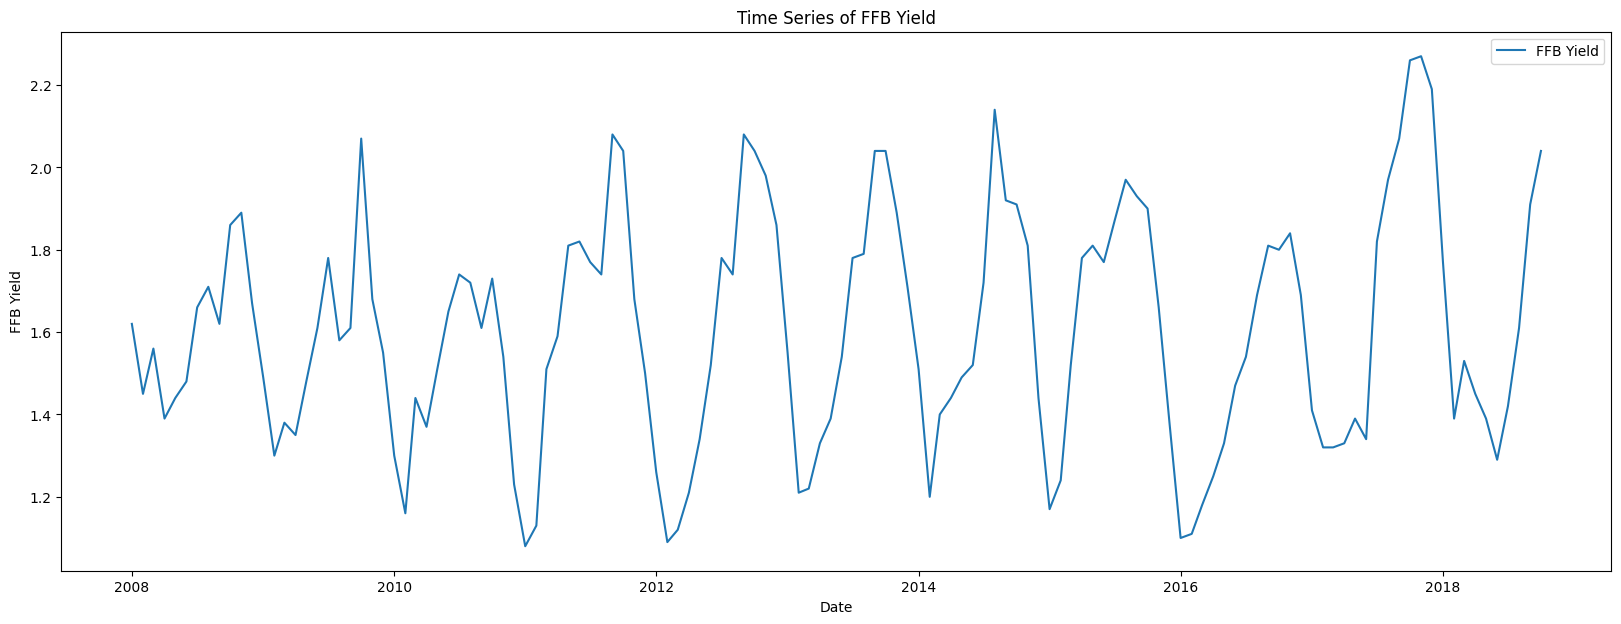

In [34]:
import matplotlib.pyplot as plt

# Set the Date column as the index
palm_data.set_index('Date', inplace=True)

# Plot time series for FFB Yield
plt.figure(figsize=(20, 7))
plt.plot(palm_data['FFB_Yield'], label='FFB Yield')
plt.title('Time Series of FFB Yield')
plt.xlabel('Date')
plt.ylabel('FFB Yield')
plt.legend()
plt.show()

Q2. Scatter Plot

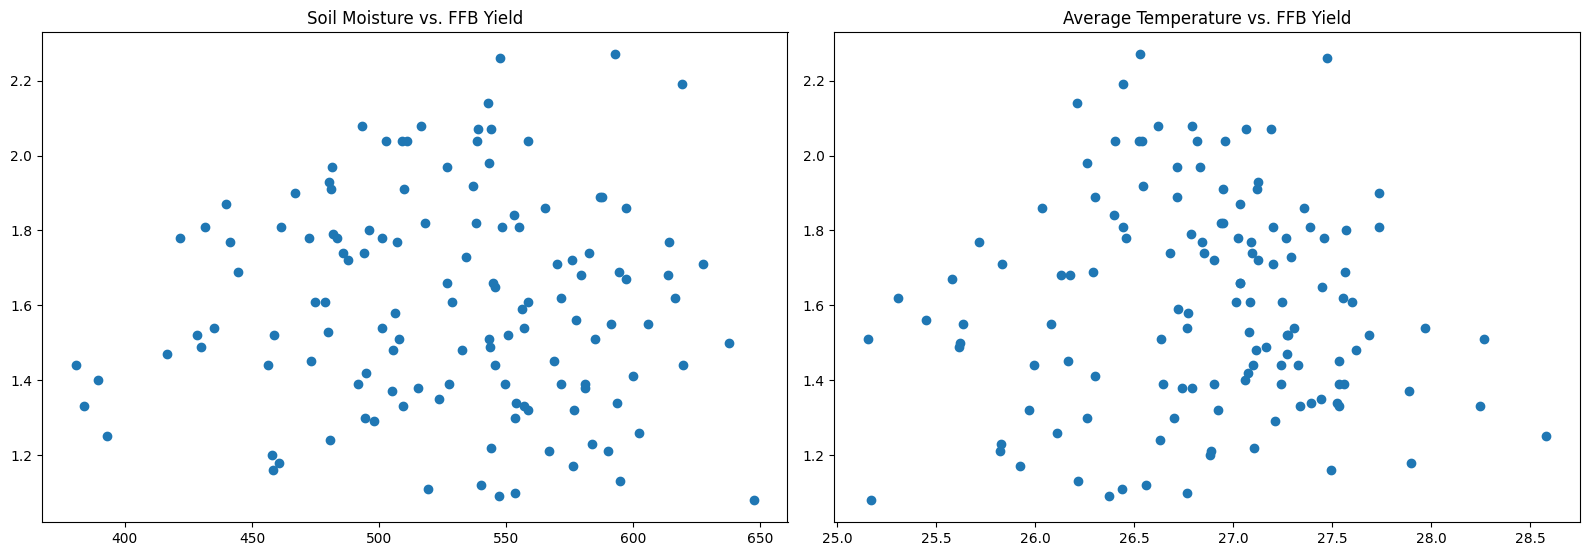

In [35]:
# Scatter plot between FFB Yield and other variables
plt.figure(figsize=(16, 16))
plt.subplot(3, 2, 1)
plt.scatter(palm_data['SoilMoisture'], palm_data['FFB_Yield'])
plt.title('Soil Moisture vs. FFB Yield')

plt.subplot(3, 2, 2)
plt.scatter(palm_data['Average_Temp'], palm_data['FFB_Yield'])
plt.title('Average Temperature vs. FFB Yield')

# Repeat for other variables...

plt.tight_layout()
plt.show()

Q2. Multiple Regression Analysis

In [36]:
import statsmodels.api as sm

# Assuming X contains the independent variables and y contains the dependent variable (FFB Yield)
X = palm_data[['SoilMoisture', 'Average_Temp', 'Precipitation', 'Working_days', 'HA_Harvested']]
X = sm.add_constant(X)  # add a constant term to the predictor

y = palm_data['FFB_Yield']

# Fit the model
model = sm.OLS(y, X).fit()

# Display regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              FFB_Yield   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     8.326
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           8.21e-07
Time:                        07:41:59   Log-Likelihood:               -0.46901
No. Observations:                 130   AIC:                             12.94
Df Residuals:                     124   BIC:                             30.14
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.4300      1.439      1.689

Q3a. Probability of the word “data” occurring in each line:

In [43]:
paragraph = """ As a term, data analytics predominantly refers to an assortment of applications, from basic business
intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced
analytics. In that sense, it's similar in nature to business analytics, another umbrella term for
approaches to analyzing data -- with the difference that the latter is oriented to business uses, while
data analytics has a broader focus. The expansive view of the term isn't universal, though: In some
cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate
category. Data analytics initiatives can help businesses increase revenues, improve operational
efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to
emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of
boosting business performance. Depending on the particular application, the data that's analyzed
can consist of either historical records or new information that has been processed for real-time
analytics uses. In addition, it can come from a mix of internal systems and external data sources. At
a high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find
patterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical
techniques to determine whether hypotheses about a data set are true or false. EDA is often
compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a
distinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data
analytics can also be separated into quantitative data analysis and qualitative data analysis. The
former involves analysis of numerical data with quantifiable variables that can be compared or
measured statistically. The qualitative approach is more interpretive -- it focuses on understanding
the content of non-numerical data like text, images, audio and video, including common phrases,
themes and points of view.
"""
import nltk
nltk.download('punkt')

# Tokenize the paragraph into sentences
sentences = nltk.sent_tokenize(paragraph)
print(sentences)

# Calculate the probability for each line
for i, sentence in enumerate(sentences):
    words = nltk.word_tokenize(sentence)
    data_count = words.count("data")
    print(data_count)
    total_words = len(words)
    print(total_words)
    probability = data_count / total_words
    print(f"Sentence {i + 1}: Probability of 'data' = {probability:.4f}")

[' As a term, data analytics predominantly refers to an assortment of applications, from basic business\nintelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced\nanalytics.', "In that sense, it's similar in nature to business analytics, another umbrella term for\napproaches to analyzing data -- with the difference that the latter is oriented to business uses, while\ndata analytics has a broader focus.", "The expansive view of the term isn't universal, though: In some\ncases, people use data analytics specifically to mean advanced analytics, treating BI as a separate\ncategory.", 'Data analytics initiatives can help businesses increase revenues, improve operational\nefficiency, optimize marketing campaigns and customer service efforts, respond more quickly to\nemerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of\nboosting business performance.', "Depending on the particular application, the data that's 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Q3b. Distribution of distinct word counts across all lines:

In [46]:
from collections import Counter

# Tokenize the entire paragraph into words
words = nltk.word_tokenize(paragraph)

# Count distinct word occurrences
word_counts = Counter(words)

# Count distribution of distinct word counts
distinct_counts = Counter(word_counts.values())
print(distinct_counts)

# Print the distribution
print("Distinct Word Counts Distribution:")
for count, frequency in distinct_counts.items():
    print(f"{count} words: {frequency} times")

Counter({1: 161, 2: 18, 3: 7, 4: 5, 5: 4, 10: 3, 11: 2, 23: 1, 15: 1, 9: 1, 8: 1})
Distinct Word Counts Distribution:
1 words: 161 times
10 words: 3 times
3 words: 7 times
23 words: 1 times
15 words: 1 times
11 words: 2 times
2 words: 18 times
4 words: 5 times
9 words: 1 times
5 words: 4 times
8 words: 1 times


Q3c. Probability of the word “analytics” occurring after the word “data”:

In [47]:
import nltk

# Tokenize the entire paragraph into words
words = nltk.word_tokenize(paragraph)

# Find indices of occurrences of the word "data"
data_indices = [i for i, word in enumerate(words) if word.lower() == "data"]

# Initialize a list to store indices of "analytics" appearing after "data"
analytics_after_data_indices = []

# Check each index where "data" is found to see if "analytics" follows
for i in data_indices:
    # Ensure we're not at the last word in the list to avoid IndexError
    if i < len(words) - 1:
        # Check if the next word is "analytics"
        if words[i + 1].lower() == "analytics":
            # If so, add the index to our list
            analytics_after_data_indices.append(i + 1)

# Calculate the probability
if data_indices:
    # Calculate the probability of "analytics" after "data"
    probability_analytics_after_data = len(analytics_after_data_indices) / len(data_indices)
    # Print the result
    print(f"Probability of 'analytics' after 'data': {probability_analytics_after_data:.4f}")
else:
    # If there are no occurrences of "data," print a message
    print("No occurrences of 'data' found in the paragraph.")


Probability of 'analytics' after 'data': 0.3333
